In [1]:
import pandas as pd

In [4]:
import os.path

In [142]:
import numpy as np

In [5]:
import os

In [109]:
import time
import datetime

In [92]:
import matplotlib.pyplot as plt

In [105]:
from tqdm.notebook import tqdm

In [119]:
def unixdate(x):
    return time.mktime(datetime.datetime.strptime(x, "%d-%m-%Y").timetuple())

In [150]:
def normaldate(x):
    return datetime.datetime.utcfromtimestamp(x).strftime('%d-%m-%Y')

In [74]:
def smartsort(x):
    try:
        return int(x.split(".")[0])
    except:
        return x.split(".")[0]

In [167]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [75]:
files = os.listdir("../historic_data/csv/")
files.sort(key=smartsort)

TypeError: '<' not supported between instances of 'int' and 'str'

In [65]:
files[:20]

['0003.HK.csv',
 '0004.HK.csv',
 '0005.HK.csv',
 '0006.HK.csv',
 '0008.HK.csv',
 '001067.KS.csv',
 '0011.HK.csv',
 '0012.HK.csv',
 '0016.HK.csv',
 '0017.HK.csv',
 '0019.HK.csv',
 '0020.HK.csv',
 '0021.HK.csv',
 '0023.HK.csv',
 '0027.HK.csv',
 '0028.HK.csv',
 '0040.KL.csv',
 '0045.HK.csv',
 '0058.KL.csv',
 '0071.HK.csv']

In [111]:
old = ""
new = "o"
new_files = []
j=-1
for i in range(0):
    if i<j-1:
        print(i)
        continue
    s = files[i].split(".")
    try: 
        int(s[0])
        print(s)
    except:
        0
    new = s[1]
    if len(s)>2 and old==new and s[0].isnumeric():

        j=i+1
        print(j)
        new_s = new
        while new_s == new:

            new_s = files[j].split(".")[1]
            j = j + 1
            
        print(j)
        print(new_s)
        print(new)
        print(files[j])
        new_files.append(files[j])        
        old = new_s
    else:
        old = s[1]
        new_files.append(files[i])

In [112]:
old = ""
new = "o"
new_files = []
j=-1
for i in range(len(files)):
    s = files[i].split(".")
    try: 
        int(s[0])
        #print(s)
    except:
        new_files.append(files[i])

In [106]:
df = pd.DataFrame([])
i = 0
for i in tqdm(range(len(new_files[:100]))):
    
    a = pd.read_csv("../historic_data/csv/" + new_files[i])
    s = f.split(".")
    a["stock_id"] = i
    if len(s)>2:
        name = ""
        for i in range(len(s)-2):
            name = name + s[i] + "_"
        name = name + s[-2]
        a["stock"] = name
    else:
        a["stock"] = s[0]
    
    df = pd.concat([df,a])
    

In [132]:
df["unix_date"] = df["Date"].apply(unixdate)

In [164]:
df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close,stock_id,stock,unix_date
0,08-04-2013,9.726,9.726,0.0,9.726,9.726,0.097106,0,ASAZY,1.365372e+09
1,09-04-2013,9.552,9.552,0.0,9.552,9.552,0.095369,0,ASAZY,1.365458e+09
2,10-04-2013,9.820,9.820,0.0,9.820,9.820,0.098045,0,ASAZY,1.365545e+09
3,11-04-2013,9.682,9.682,0.0,9.682,9.682,0.096667,0,ASAZY,1.365631e+09
4,12-04-2013,9.887,9.887,500.0,10.225,10.225,0.102088,0,ASAZY,1.365718e+09


In [176]:
df["unix_date"] = df["unix_date"]/3600

In [177]:
df["unix_date"] = df["unix_date"] - df["unix_date"].min()

In [185]:
days = df["unix_date"].value_counts().keys()

In [184]:
np.arange(0.0,df["unix_date"].max(),24.0).shape[0]

14612

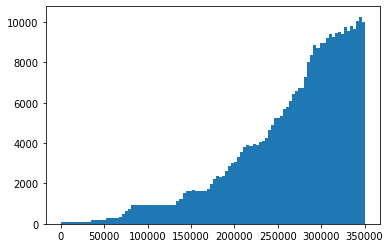

In [178]:
plt.hist(df["unix_date"].values,bins=100);

/opt/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/opt/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


([<matplotlib.axis.XTick at 0x1214212b0>,
 [Text(0, 0, '17-03-1980'),
  Text(0, 0, '27-08-1984'),
  Text(0, 0, '06-02-1989'),
  Text(0, 0, '18-07-1993'),
  Text(0, 0, '28-12-1997'),
  Text(0, 0, '08-06-2002'),
  Text(0, 0, '18-11-2006'),
  Text(0, 0, '29-04-2011'),
  Text(0, 0, '09-10-2015'),
  Text(0, 0, '19-03-2020')])

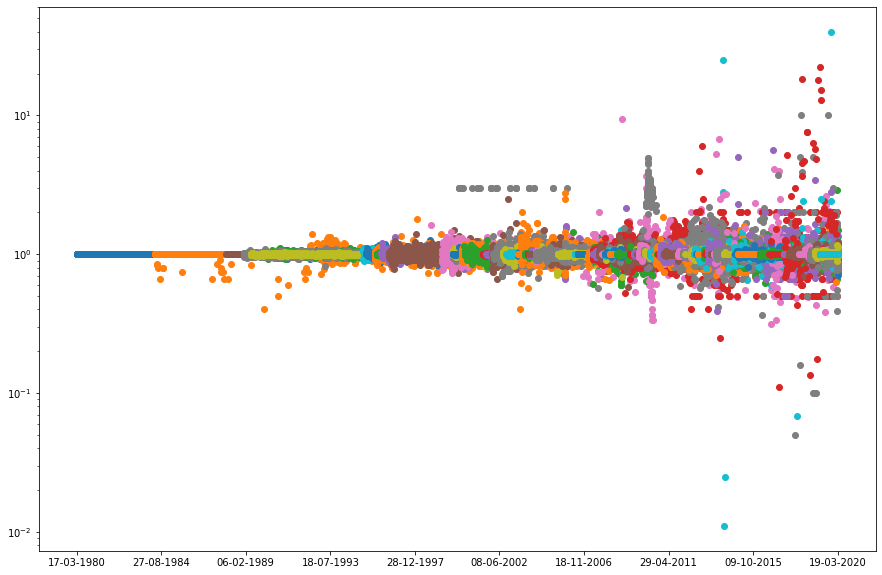

In [163]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
for f in df["stock_id"].value_counts().keys():
    cut = df["stock_id"]==f
    X = df[cut]["unix_date"].values
    
    Y = df[cut]["Close"].values/df[cut]["Open"].values
    plt.plot(X,Y,"o")
  
T = np.linspace(df["unix_date"].min(),df["unix_date"].max(),10)
plt.yscale("log")
plt.xticks(T,np.vectorize(normaldate)(T))

In [ ]:
good_cols = df["unix_date"]

In [159]:
map(normaldate,T)

TypeError: 'map' object is not subscriptable

In [82]:
len(a)

3441

In [83]:
a.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,20-07-2006,50.328461,50.328461,0,50.328461,50.328461,26.556471
1,21-07-2006,49.586777,49.586777,0,49.586777,49.586777,26.165108
2,24-07-2006,49.586777,49.586777,0,49.586777,49.586777,26.165108
3,25-07-2006,50.593346,50.593346,300,50.593346,50.593346,26.696234
4,26-07-2006,50.593346,50.593346,0,50.593346,50.593346,26.696234
